In [1]:
from matminer.datasets import load_dataset

df = load_dataset('steel_strength', data_home='.')
df

,formula,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti,yield strength,tensile strength,elongation
0,Fe0.620C0.000953Mn0.000521Si0.00102Cr0.000110N...,0.02,0.05,0.05,0.01,19.70,2.95,0.01,0.00,0.01,15.00,0.00,0.15,1.55,2411.5,2473.5,7.0
1,Fe0.623C0.00854Mn0.000104Si0.000203Cr0.147Ni0....,0.18,0.01,0.01,13.44,0.01,3.01,0.46,0.04,0.01,19.46,2.35,0.04,0.00,1123.1,1929.2,8.0
2,Fe0.625Mn0.000102Si0.000200Cr0.0936Ni0.129Mo0....,0.00,0.01,0.01,8.67,13.45,0.82,0.01,0.00,0.01,13.90,0.00,0.39,0.57,1736.3,1871.8,NaN
3,Fe0.634C0.000478Mn0.000523Si0.00102Cr0.000111N...,0.01,0.05,0.05,0.01,17.70,3.95,0.01,0.00,0.01,15.00,0.00,0.13,1.47,2487.3,2514.9,9.0
4,Fe0.636C0.000474Mn0.000518Si0.00101Cr0.000109N...,0.01,0.05,0.05,0.01,19.40,1.45,0.01,0.00,0.01,14.90,0.00,0.13,1.55,2249.6,2315.0,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,Fe0.823C0.0176Mn0.00183Si0.000198Cr0.0779Ni0.0...,0.38,0.18,0.01,7.27,0.01,3.77,0.96,0.00,0.01,4.90,0.00,0.03,0.00,1722.5,1998.1,5.0
308,Fe0.823Mn0.000618Si0.00101Cr0.0561Ni0.0984Mo0....,0.00,0.06,0.05,5.15,10.20,3.20,0.01,0.00,0.01,0.01,0.00,0.03,0.09,1019.0,1019.0,19.0
309,Fe0.825C0.0174Mn0.00175Si0.000201Cr0.0565Ni0.0...,0.37,0.17,0.01,5.20,0.01,5.84,1.05,0.00,0.91,4.88,0.00,0.03,0.00,1860.3,2156.6,3.0
310,Fe0.858C0.0191Mn0.00194Si0.000199Cr0.0753Ni0.0...,0.41,0.19,0.01,6.99,0.01,5.84,0.92,0.00,0.01,0.02,0.00,0.03,0.00,1812.1,2087.7,2.0


In [2]:
X = df.drop(['formula', 'yield strength', 'tensile strength', 'elongation'], axis = 1)
y = df['tensile strength'].values

In [3]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()

In [4]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score

crossvalidation = KFold(n_splits=10, shuffle=True)

In [5]:
scores_r2 = cross_val_score(dt, X, y, scoring = 'r2', cv = crossvalidation)
scores_rmse = cross_val_score(dt, X, y, scoring='neg_root_mean_squared_error',
                              cv=crossvalidation)

print('Cross-validation results:')
print('Folds: %i, mean R2: %.3f' % (len(scores_r2), np.mean(scores_r2)))
print('Folds: %i, mean RMSE: %.3f' % (len(scores_rmse), -np.mean(scores_rmse)))

Cross-validation results:
Folds: 10, mean R2: 0.676
Folds: 10, mean RMSE: 197.197


In [6]:
from sklearn.model_selection import cross_val_predict
y_cv = cross_val_predict(dt, X, y, cv=crossvalidation)

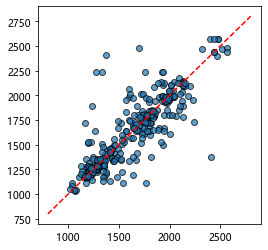

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
plt.plot([800, 2800], [800, 2800], 'r--')
plt.scatter(y, y_cv, edgecolor = 'k', alpha = 0.7)
plt.show()

In [8]:
dt.fit(X, y)

DecisionTreeRegressor()

In [9]:
importances_dt = dt.feature_importances_
imp_sort_dt = np.argsort(importances_dt)[::-1]
feat_name = X.columns.values

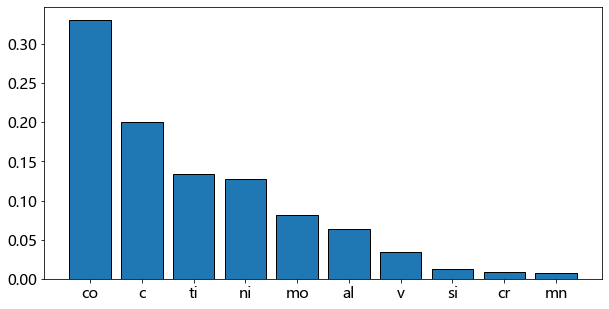

In [10]:
plt.figure(figsize = (10, 5))
plt.bar(x = feat_name[imp_sort_dt][0:10], height = importances_dt[imp_sort_dt][0:10], edgecolor = 'k')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

# 随机森林算法

In [11]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

In [12]:
scores_r2 = cross_val_score(rf, X, y, scoring = 'r2', cv = crossvalidation)
scores_rmse = cross_val_score(rf, X, y, scoring='neg_root_mean_squared_error',
                              cv=crossvalidation)

print('Cross-validation results:')
print('Folds: %i, mean R2: %.3f' % (len(scores_r2), np.mean(scores_r2)))
print('Folds: %i, mean RMSE: %.3f' % (len(scores_rmse), -np.mean(scores_rmse)))

Cross-validation results:
Folds: 10, mean R2: 0.824
Folds: 10, mean RMSE: 127.325


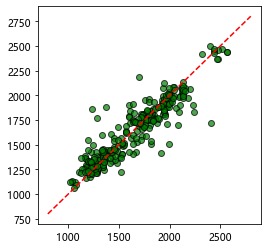

In [13]:
plt.figure(figsize=(4, 4))
plt.plot([800,2800], [800, 2800], 'r--')
plt.scatter(y, cross_val_predict(rf, X, y, cv=crossvalidation),
            c = 'g', edgecolor = 'k', alpha = 0.7)
plt.show()

# 极端树

In [14]:
from sklearn.ensemble import ExtraTreesRegressor

et = ExtraTreesRegressor()

In [15]:
scores_r2 = cross_val_score(et, X, y, scoring = 'r2', cv = crossvalidation)
scores_rmse = cross_val_score(et, X, y, scoring='neg_root_mean_squared_error',
                              cv=crossvalidation)

print('Cross-validation results:')
print('Folds: %i, mean R2: %.3f' % (len(scores_r2), np.mean(scores_r2)))
print('Folds: %i, mean RMSE: %.3f' % (len(scores_rmse), -np.mean(scores_rmse)))

Cross-validation results:
Folds: 10, mean R2: 0.893
Folds: 10, mean RMSE: 104.773


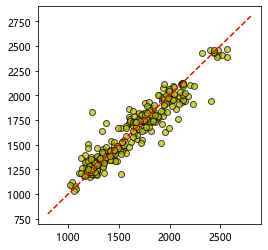

In [18]:
plt.figure(figsize=(4, 4))
plt.plot([800,2800], [800, 2800], 'r--')
plt.scatter(y, cross_val_predict(et, X, y, cv=crossvalidation), c = 'y', edgecolor = 'k', alpha = 0.7)
plt.show()

In [20]:
et.fit(X, y)

ExtraTreesRegressor()

In [21]:
importances_et = et.feature_importances_
imp_sort_et = np.argsort(importances_et)[::-1]

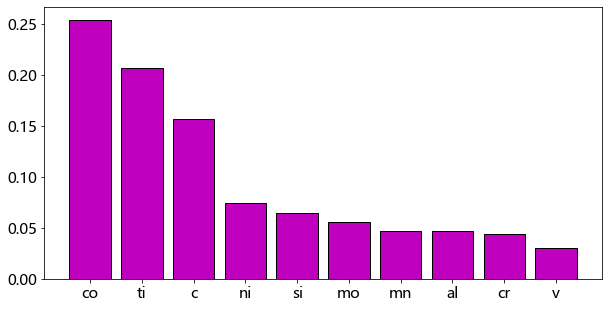

In [22]:
plt.figure(figsize = (10, 5))
plt.bar(x = feat_name[imp_sort_et][0:10], height = importances_et[imp_sort_et][0:10],
        color = 'm', edgecolor = 'k')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()